# 딥러닝 (Week 12. Autoencoder & GAN)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

강의계획
1. 효율적인 데이터 표현
2. 과소완전 선형 오토인코더로 PCA 수행하기
3. 적층 오토인코더
4. 다양한 형태의 오토인코더
  - 합성곱 오토인코더
  - 순환 오토인코더
  - 잡음 제거 오토인코더
  - 희소 오토인코더
  - 변이형 오토인코더
5. 생성적 적대 신경망
  - GAN 훈련의 어려움
  - 심층 합성곱 GAN (DCGAN)
  - ProGAN
  - StyleGAN

## 0. 맛보기

### 1) 오토인코더 (autoencoder)

#### (1) 개념

- 어떤 지도 없이도 (즉, 레이블되어 있지 않은 훈련 데이터를 사용해서) 잠재표현 (latent representation) 또는 코딩 (coding) 이라 부르는 입력 데이터의 밀집 표현을 학습할 수 있는 인공 신경망 ♣
    - 단순히 입력을 출력으로 복사하는 방법을 배움
- 입력보다 훨씬 낮은 차원의 잠재표현, 코딩을 학습하므로 차원축소, 시각화에 유용
- 오토인코더를 활용해 훈련 데이터와 매우 비슷한 새로운 데이터를 생성 --> 생성 모델 (generative model)

### 2) 생성적 적대 신경망 (GAN; generative adversarial networks)

#### (1) 개념

- 생성자(generator)와 판별자(discriminator)의 신경망 두 개로 구성
    - 생성자: 훈련 데이터와 비슷하게 보이는 데이터를 생성
    - 판별자: 가짜 데이터와 진짜 데이터를 구별
- 생성자와 판별자의 적대적 훈련(adversarial training)을 통해 신경망을 훈련 ♣♣

#### (2) 예시

- 예제:
    - StyleGAN을 사용한 가짜 얼굴 생성: https://thispersondoesnotexist.com/
    - 에어비앤비의 침실을 생성한 이미지: https://thisrentaldoesnotexist.com/
    - 초해상도(이미지 해상도 높이기)
    - 이미지를 컬러로 바꾸기: https://github.com/jantic/DeOldify
    - 강력한 이미지 편집 (원하지 않는 배경 바꾸기)
    - 간단한 스케치를 실제 같은 이미지로 바꾸기
    - 동영상에서 다음 프레임 예측하기
    - (다른 모델 훈련을 위한) 데이터 증식: http://www.aitimes.com/news/articleView.html?idxno=144919
    - (텍스트, 오디오, 시계열 같은) 여러 다른 종류의 데이터 생성
    - 다른 모델의 취약점을 식별하고 개선하기 등

## 1. 오토인코더

### 1) 개념 : 효율적 데이터 표현

#### (1) 패턴 파악

- 다음 숫자 시퀀스 중 무엇을 더 쉽게 기억할 수 있을까? (시작 숫자, 종료 숫자, 2씩 감소) 
    - 40, 27, 25, 36, 81, 57, 10, 73, 19, 68
    - 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14

- 1] 제약 없음 : 오토인코더에 제약을 가하지 않으면 시퀀스를 모두 외워버림
- 2] 제약 존재 : 오토인코더에 제약을 가해서 데이터에 있는 패턴을 찾도록 해야함
    - 기억, 지각, 패턴 매칭 (pattern matching)에 대한 1970년대 연구: https://homl.info.111
        - 숙련된 체스 플레이어가 체스판을 5초만 보고도 전체 말의 위치를 외울 수 있음
        - 그러나 이는 체스 말이 무작위로 놓여 있을 때가 아니라 (실제 게임처럼) 현실적인 위치에 있을 경우임
    - 즉, 패턴을 찾으면 효율적으로 정보를 저장할 수 있음

### 2) 구조

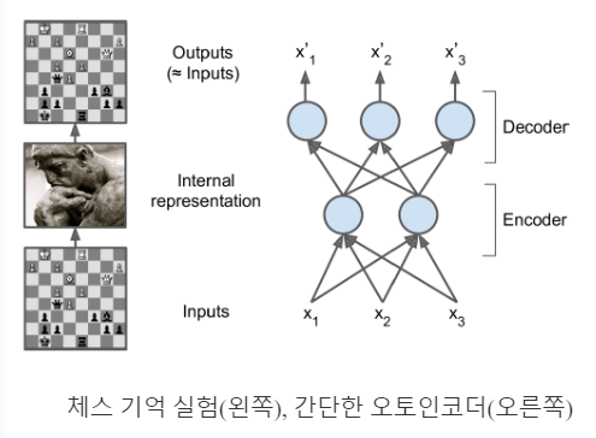

- (1) 오토인코더가 입력을 받아 효율적인 내부 표현(internal representation)으로 바꾸고 입력과 가장 가까운 어떤 것을 출력
  - 1] 인코더(encoder): 인지 네트워크(recognition network)로 입력을 내부 표현으로 바꿈 ♣
  - 2] 디코더(decoder): 생성 네트워크(generative network)로 내부 표현을 출력으로 바꿈 ♣

- (2) 출력층의 뉴런 수가 입력 개수와 동일하다는 것을 제외하면, 오토인코더는 다층 퍼셉트론과 구조가 동일
  - 1] 뉴런 두 개로 구성된 하나의 은닉층 (인코더) 
  - 2] 뉴런 세 개로 구성된 출력층 (디코더)

### 3) 재구성

- (1) 재구성 : 오토인코더가 입력을 재구성하기 때문에 출력을 재구성(reconstruction)이라고 부름 
- (2) 재구성 손실 : 비용 함수는 재구성이 입력과 다를 때 모델에 벌점을 부과하는 재구성 손실(reconstruction loss)을 포함함

### 4) 종류

- 1] 과소완전(undercomplete) : 내부 표현이 입력 데이터보다 저차원(3차원 -> 2차원)인 인코더
    - 과소완전 오토인코더는 입력을 코딩으로 간단히 복사할 수 없으며, 입력과 똑같은 것을 출력하기 위한 방법을 찾아야함 
    - 이를 통해 입력 데이터에서 가장 중요한 특성을 학습하도록 만듦 
    - 적어도 입력 데이터에 대해서는 복원(재구성)을 잘한다는 특징이 있음
- 2] 과대완전(overcomplete) : 내부 표현이 입력 데이터보다 고차원인 인코더


### 5) 활용

#### (1) PCA(주성분 분석) by 선형 과소완전 인코더 

- 주성분 분석(PCA) = 활성화 함수 : 선형 + 비용 함수 : 평균 제곱 오차(MSE)

- 3D 데이터셋 생성:
  - 오토인코더는 인코더 다음에 디코더가 뒤따르는 Sequential 모델 
  - 오토인코더의 출력 개수 = 입력 개수 (e.g., 아래 코드에서는 3개) 
  - 단순한 PCA 수행을 위해서는 활성화 함수 사용 X (= 모든 뉴런이 선형), 비용함수는 MSE

In [1]:
import numpy as np

np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

오토인코더 제작:

In [2]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [3]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 5ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [4]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 7ms/step


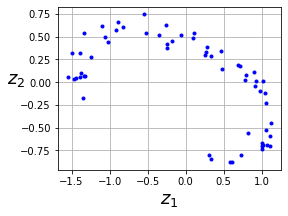

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

- 오토인코더는 (PCA처럼) 데이터에 있는 분산이 가능한 많이 보존되도록 데이터를 투영할 최상의 2D 평면을 찾음

### 6) 종류

#### (1) 적층 오토인코더 (stacked autoencoder) 또는 심층 오토인코더 (deep autoencoder)

1] 개념
  - 은닉층을 여러 개 가지는 오토인코더 ♣
  - 층을 더 추가하여 더 복잡한 코딩을 학습할 수 있음 
  - 오토인코더가 너무 강력해지지 않도록 주의 
    - 인코더가 너무 강력해서 각각의 입력 데이터를 임의의 한 숫자로 매핑하도록 학습했다고 가정 
    - 훈련 데이터를 완벽히 재구성하겠지만, 유용한 데이터 표현을 학습하지 못할 것 
    - 적층 오토인코더는 전형적으로 가운데 은닉층(코딩 층)을 기준으로 대칭
      - 예: 입력 784개, 뉴런 300개로 된 은닉층, 뉴런 150개로 된 가운데 은닉층, 뉴런 300개로 된 은닉층, 뉴런 784개로 된 출력층

2] 구조

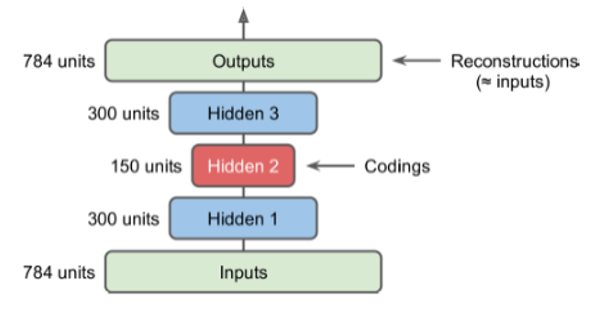

3] 케라스 구현

[1] 패션 MNIST 데이터셋에서 SELU 활성화 함수를 사용한 적층 오토인코더 
- 오토인코더 모델을 인코더와 디코더 두 모델로 나눔 
    - 인코더 
      - 28x28 픽셀의 흑백 이미지를 받고, 이미지를 784 크기의 벡터로 표현하기 위해 펼침 
      - SELU 활성화 함수를 사용하는 Dense 층 두 개에 통과시킴 ♣♣♣
      - 각 입력 이미지에 대해 인코더는 크기가 30인 벡터를 출력함
    - 디코더 
      - 크기가 30인 코딩을 받아, 크기가 커지는 Dense 층 두 개에 통과시킴 
      - 최종 벡터를 28x28 배열로 변경하여 디코더의 출력이 인코더의 입력과 동일한 크기가 되도록 함 
      - 적층 인코더를 컴파일할 때 평균 제곱 오차 대신 이진 크로스 엔트로피 손실을 사용 ♣♣♣
        - 재구성 작업을 다중 레이블 이진 분류 문제로 다루는 것 
        - 각 픽셀의 강도는 픽셀이 검정일 확률을 나타냄 
      - X_train을 입력과 타깃으로 사용해 모델을 훈련(X_valid를 검증 입력과 검증 타깃으로 사용)

MNIST 데이터셋을 사용:

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


3개의 은닉층과 1개의 출력층(즉, 두 개를 적층)을 가진 적층 오토인코더:

In [7]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [1]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"), # ㅁ selu가 아닌 sigmoid 사용
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", # ㅁ mse 대신 이진 분류 사용
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

NameError: name 'tf' is not defined

4] 활용

[1] 재구성

- 오토인코더가 잘 훈련되었는지 확인하는 방법은 입력과 출력을 비교하는 것 ♣ 오차가 작더라도 사람의 판단이 다른 경우가 많음
- 입력과 출력의 차이가 크지 않아야 함

이 함수는 오토인코더를 사용해 몇 개의 테스트 이미지를 처리한 후, 원본 이미지와 재구성 이미지를 시각화:

In [9]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 248ms/step


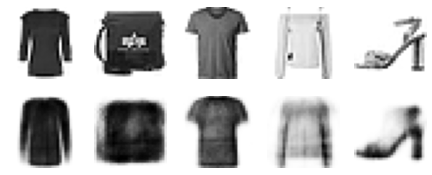

In [10]:
show_reconstructions(stacked_ae)

- 재구성된 이미지를 식별할 수는 있지만, 정보를 많이 잃은 모습을 보임 
- 모델을 더 훈련하고 인코더/디코더 층을 늘리거나 코딩을 늘리면 나아질 수 있으나, 네트워크가 너무 강력하면 데이터에서 유익한 패턴을 학습하지 못하고 완벽한 재구성 이미지를 만들려할 것

[2] 데이터셋 시각화

- 훈련한 적층 오토인코더 모델을 사용해, 데이터 셋의 차원을 축소할 수 있음 
- 시각화 입장에서 보면, 다른 차원 축소 알고리즘만큼의 성능은 아니지만 샘플과 특성이 많은 대용량 데이터셋을 다룰 수 있음 ♣
- 오토인코더를 사용해 적절히 차원을 축소하고, 다른 차원 축소 알고리즘을 사용해 시각화하는 것도 방법이 됨 ♣

In [11]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


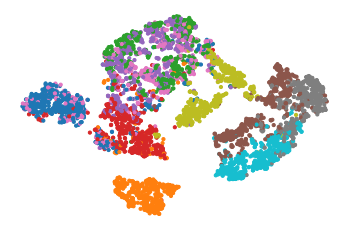

In [12]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

예제 이미지와 함께 시각화:

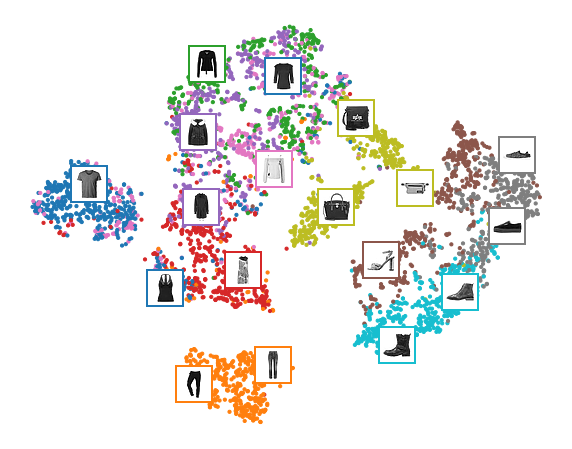

In [13]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html 참고
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

[3] 적층 오토인코더를 사용한 비지도 사전훈련

1]] 개념

- Motivation
  - 레이블 없는 데이터는 많고 레이블된 데이터는 적은 경우가 많음
  - 이러한 경우 (레이블된 것과 레이블되지 않은) 모든 훈련 데이터를 사용해 오토인코더를 훈련하고, 인코더 층을 재사용하여 새로운 신경망을 만듦
- 비슷한 문제를 학습한 신경망을 찾아 하위층을 재사용하는 방법을 통해, 적은 훈련 데이터를 사용해 고성능 모델을 훈련할 수 있음 
- 레이블된 훈련 데이터가 많지 않을때 적층 오토인코더를 통해 훈련 ♣♣
  - 대부분 레이블되지 않은 대량의 데이터셋을, 먼저 전체 데이터셋을 사용해 적층 오토인코더를 훈련
  - 그 다음, 오토인코더의 하위층을 재사용해 실제 문제를 해결하기 위한 신경망을 만들고, 레이블된 데이터를 사용해 훈련

2]] 구조

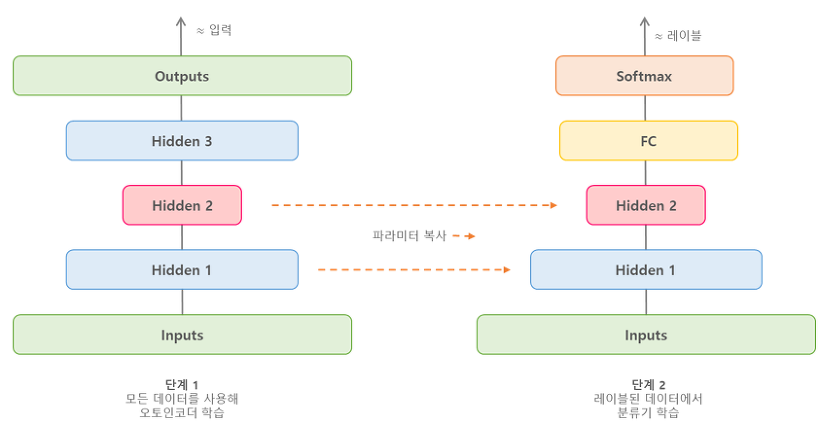

5] 훈련 기법

[1] 가중치 묶기 ♣♣

1]] 개념

- 오토인코더가 대칭일 땐, 디코더의 가중치와 인코더의 가중치를 묶을 수 있음

2]] 특징 ♣

- 모델에 있는 가중치의 수를 절반으로 줄여 훈련 속도를 높이고, 과대적합의 위험을 줄임 
    - 어떤 오토인코더가 N개 층을 갖고, W_L이 L번째 층의 가중치를 나타낼 때 (1은 첫 번째 은닉층, N/2은 코딩 층, N은 출력층) 디코더 층의 가중치는 W_N - L + 1 = WL^T (L = 1,2, ..., N/2) ♣♣♣♣

- 사용자 정의 층을 사용해 인코더의 가중치를 전치(transpose)하여 디코더의 가중치로 사용:

In [14]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [15]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3080 - val_rounded_accuracy: 0.9080
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2975 - rounded_accuracy: 0.9223 - val_loss: 0.2951 - val_rounded_accuracy: 0.9285
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3016 - val_rounded_accuracy: 0.9090
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9333
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2865 - rounded_accuracy: 0.9324 - val_loss: 0.2875 - val_rounded_accuracy: 0.9312
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2861 - val_rounded_accuracy: 0.9353
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 70ms/step


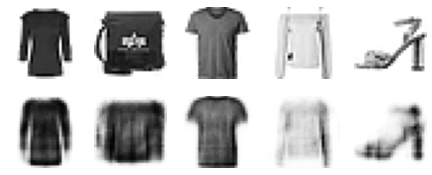

In [16]:
show_reconstructions(tied_ae)
plt.show()

- 기존 오토인코더와 비교했을 때 거의 절반의 파라미터로 약간 낮은 재구성 오차를 달성함 ♣♣

[2] 한 번에 오토인코더 한 개씩 훈련 ♣♣ 반드시 기억

1]] 개념

- 기법 2: 한 번에 오토인코더 한 개씩 훈련하기
  - 한 번에 전체 오토인코더를 훈련하지 않고, 오토인코더 하나를 훈련하고 이를 쌓아올려서 한 개의 적층 오토인코더를 만들 수 있음 --> 탐욕적 방식의 층별 훈련(greedy layerwise training) ♣♣
  - 현재는 많이 사용하지 않음

2]] 구조

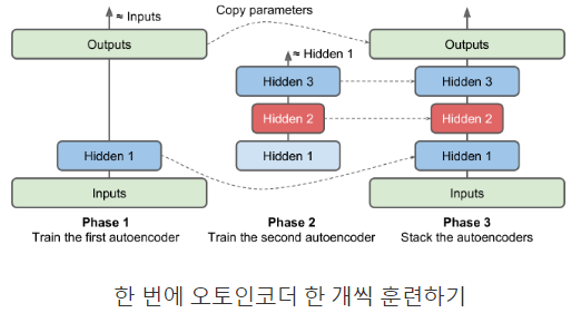

In [17]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3445 - rounded_accuracy: 0.8874 - val_loss: 0.3123 - val_rounded_accuracy: 0.9146
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3039 - rounded_accuracy: 0.9203 - val_loss: 0.3006 - val_rounded_accuracy: 0.9246
Epoch 3/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.2949 - rounded_accuracy: 0.9286 - val_loss: 0.2934 - val_rounded_accuracy: 0.9317
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2891 - rounded_accuracy: 0.9342 - val_loss: 0.2888 - val_rounded_accuracy: 0.9363
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2853 - rounded_accuracy: 0.9378 - val_loss: 0.2857 - val_rounded_accuracy: 0.9392
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2827 - rounded_accuracy: 0.9403 - val_loss: 0.2834 - val_rounded_accuracy: 0.9409
Epoch 7/10
1719/1719 [===========

In [19]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

1/1 [==============================] - 0s 70ms/step


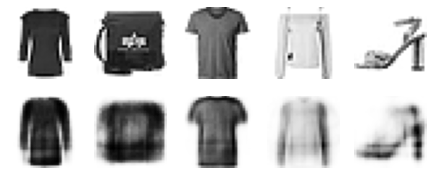

In [20]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [21]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2867 - rounded_accuracy: 0.9343 - val_loss: 0.2883 - val_rounded_accuracy: 0.9341
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2863 - rounded_accuracy: 0.9347 - val_loss: 0.2881 - val_rounded_accuracy: 0.9347
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2861 - rounded_accuracy: 0.9349 - val_loss: 0.2879 - val_rounded_accuracy: 0.9347
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2859 - rounded_accuracy: 0.9351 - val_loss: 0.2877 - val_rounded_accuracy: 0.9349
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2858 - rounded_accuracy: 0.9353 - val_loss: 0.2876 - val_rounded_accuracy: 0.9351
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2857 - rounded_accuracy: 0.9354 - val_loss: 0.2874 - val_rounded_accuracy: 0.9350
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 74ms/step


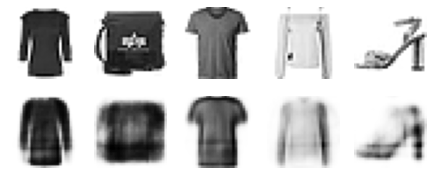

In [22]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

#### (2) 합성곱 오토인코더 (convolutional autoencoder)

1] 개념

- 이미지 데이터 : 이미지를 다룰 때는, 합성곱 신경망이 밀집 네트워크보다 잘 맞음
  - 이미지에 대한 오토인코더를 위한 합성곱 오토인코더 

2] 구조

- 인코더는 합성곱 층과 풀링 층으로 구성된 일반적인 CNN 
  - 입력에서 공간 방향의 차원(높이, 너비)를 줄이고, 특성 맵의 개수(깊이)를 늘림 
- 디코더는 반대로 동작 
  - 이미지의 스케일을 늘리고, 깊이를 원본 차원으로 되돌림-> 전치 합성곱 층 사용 ♣

3개의 은닉층과 1개의 출력층(즉, 두 개를 적층)을 가진 적층 오토인코더:

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 87s 50ms/step - loss: 0.3018 - rounded_accuracy: 0.9187 - val_loss: 0.2843 - val_rounded_accuracy: 0.9300
Epoch 2/5
1719/1719 [==============================] - 86s 50ms/step - loss: 0.2756 - rounded_accuracy: 0.9413 - val_loss: 0.2729 - val_rounded_accuracy: 0.9456
Epoch 3/5
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2708 - rounded_accuracy: 0.9462 - val_loss: 0.2696 - val_rounded_accuracy: 0.9497
Epoch 4/5
1719/1719 [==============================] - 93s 54ms/step - loss: 0.2682 - rounded_accuracy: 0.9490 - val_loss: 0.2685 - val_rounded_accuracy: 0.9492
Epoch 5/5
1719/1719 [==============================] - 97s 56ms/step - loss: 0.2664 - rounded_accuracy: 0.9509 - val_loss: 0.2673 - val_rounded_accuracy: 0.9506


In [24]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)        

1/1 [==============================] - 0s 167ms/step


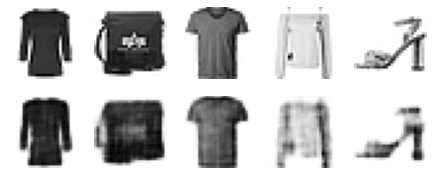

In [25]:
show_reconstructions(conv_ae)
plt.show()

#### (3) 순환 오토인코더 (recurrent autoencoder)

1] 개념

- 비지도 학습이나 차원 축소를 위해, 시계열이나 텍스트와 같은 시퀀스에 대한 오토인코더를 만들때는 순환 신경망 사용 

2] 구조 ♣♣

- [1] 인코더 : 일반적으로 입력 시퀀스를 하나의 벡터로 압축하는 시퀀스-투-벡터 RNN
- [2] 디코더 : 반대로 벡터-투-시퀀스 RNN

In [26]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

In [27]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 140s 78ms/step - loss: 0.5192 - rounded_accuracy: 0.7492 - val_loss: 0.4581 - val_rounded_accuracy: 0.8081
Epoch 2/10
1719/1719 [==============================] - 111s 64ms/step - loss: 0.4050 - rounded_accuracy: 0.8432 - val_loss: 0.3744 - val_rounded_accuracy: 0.8681
Epoch 3/10
1719/1719 [==============================] - 132s 77ms/step - loss: 0.3653 - rounded_accuracy: 0.8711 - val_loss: 0.3604 - val_rounded_accuracy: 0.8767
Epoch 4/10
1719/1719 [==============================] - 138s 80ms/step - loss: 0.3507 - rounded_accuracy: 0.8809 - val_loss: 0.3523 - val_rounded_accuracy: 0.8773
Epoch 5/10
1719/1719 [==============================] - 136s 79ms/step - loss: 0.3405 - rounded_accuracy: 0.8875 - val_loss: 0.3362 - val_rounded_accuracy: 0.8925
Epoch 6/10
1719/1719 [==============================] - 124s 72ms/step - loss: 0.3335 - rounded_accuracy: 0.8922 - val_loss: 0.3306 - val_rounded_accuracy: 0.8962
Epoch 7/10
1719/1719 [

1/1 [==============================] - 1s 1s/step


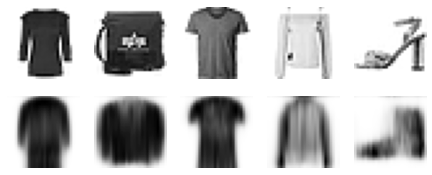

In [28]:
show_reconstructions(recurrent_ae)
plt.show()

#### (4) 잡음 제거 오토인코더 (denoising autoencoder)

1] 개념

- 오토인코더가 유용한 특성을 학습하도록 강제하는 방법으로, 입력에 잡음을 추가하고 잡음이 없는 원본 입력을 복원하도록 훈련할 수 있음 ♣

2] 구조

- 잡음은 입력에 추가된 순수한 가우시안 잡음(Gaussian noise)이거나, 드롭아웃(dropout)처럼 무작위로 입력을 꺼서 발생시킬 수 있음 ♣♣
- Dropout 층 또는 GaussianNoise 층은 훈련하는 동안에만 활성화됨 ♣♣

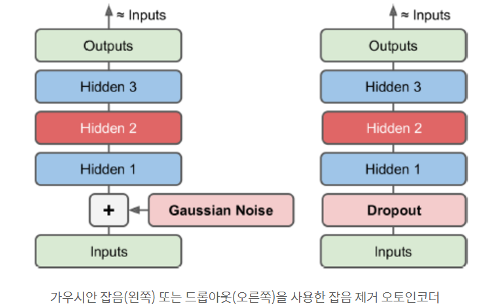

가우시안 잡음을 사용:

In [29]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3500 - rounded_accuracy: 0.8773 - val_loss: 0.3166 - val_rounded_accuracy: 0.9078
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3120 - rounded_accuracy: 0.9097 - val_loss: 0.3089 - val_rounded_accuracy: 0.9153
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3060 - rounded_accuracy: 0.9148 - val_loss: 0.3033 - val_rounded_accuracy: 0.9179
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3025 - rounded_accuracy: 0.9179 - val_loss: 0.2999 - val_rounded_accuracy: 0.9218
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2996 - rounded_accuracy: 0.9205 - val_loss: 0.2973 - val_rounded_accuracy: 0.9237
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2974 - rounded_accuracy: 0.9223 - val_loss: 0.2959 - val_rounded_accuracy: 0.9267
Epoch 7/10
1719/1719 [===========

1/1 [==============================] - 0s 70ms/step


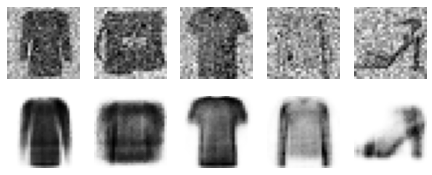

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

드롭아웃을 사용:

In [31]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3568 - rounded_accuracy: 0.8710 - val_loss: 0.3200 - val_rounded_accuracy: 0.9041
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3182 - rounded_accuracy: 0.9032 - val_loss: 0.3125 - val_rounded_accuracy: 0.9110
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3128 - rounded_accuracy: 0.9075 - val_loss: 0.3075 - val_rounded_accuracy: 0.9153
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3092 - rounded_accuracy: 0.9102 - val_loss: 0.3041 - val_rounded_accuracy: 0.9178
Epoch 5/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3067 - rounded_accuracy: 0.9123 - val_loss: 0.3015 - val_rounded_accuracy: 0.9193
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3048 - rounded_accuracy: 0.9139 - val_loss: 0.3014 - val_rounded_accuracy: 0.9172
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 74ms/step


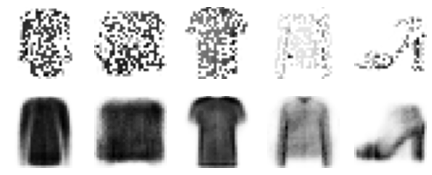

In [32]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))

- 잡음 섞인 이미지와 드롭아웃 기반의 잡음 제거 오토인코더로 재구성한 이미지 
  - 네 번째 이미지의 목 부분 같이 실제 입력에 없는 정보를 추측 
  - 데이터 시각화나 비지도 사전훈련을 위해 사용할 뿐만 아니라, 이미지에서 잡음을 제거하는 데 사용할 수 있음

#### (5) 희소 오토인코더

1] 개념

- 희소(sparsity): 좋은 특성을 추출하도록 만드는 제약의 방식 ♣♣
  - 비용 함수에 적절한 항을 추가해, 오토인코더가 코딩 층에서 활성화되는 뉴런 수를 감소시키도록 만듦
  - e.g., 코딩 층에서 평균 5% 뉴런만 활성화되도록 강제 
    - 이렇게 하면, 오토인코더가 적은 수의 활성화된 뉴런을 조합해 입력을 표현해야 함 
    - 따라서 코딩 층의 각 뉴런은 유용한 특성을 표현하게 됨

- 아래는 희소 오토인코더와의 비교를 위한 적층 오토인코더:
  - 코딩 층에 시그모이드 활성화 함수를 사용하여 코딩 값의 범위가 0~1 사이가 되도록 만듦

In [33]:
tf.random.set_seed(42)
np.random.seed(42)

simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=10,
                        validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4329 - rounded_accuracy: 0.7950 - val_loss: 0.3773 - val_rounded_accuracy: 0.8492
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3612 - rounded_accuracy: 0.8668 - val_loss: 0.3514 - val_rounded_accuracy: 0.8797
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3410 - rounded_accuracy: 0.8852 - val_loss: 0.3367 - val_rounded_accuracy: 0.8912
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3288 - rounded_accuracy: 0.8954 - val_loss: 0.3263 - val_rounded_accuracy: 0.8991
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3213 - rounded_accuracy: 0.9011 - val_loss: 0.3210 - val_rounded_accuracy: 0.9032
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3176 - rounded_accuracy: 0.9038 - val_loss: 0.3179 - val_rounded_accuracy: 0.9050
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 78ms/step


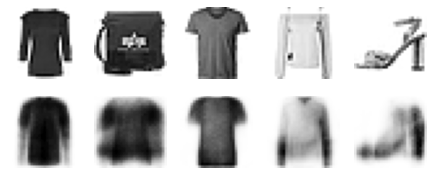

In [34]:
show_reconstructions(simple_ae)
plt.show()

활성화 히스토그램을 출력:

In [35]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

In [36]:
def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

- 인코딩 층의 활성화에 대한 히스토그램을 출력 ♣♣
  - 왼쪽의 히스토그램은 전체 활성화의 분포를 보여줌
    - 0과 1에 가까운 값이 전체적으로 더 많이 등장
    - 이는 시그모이드 함수가 포화되는 특성 때문
  - 오른쪽의 히스토그램은 평균 뉴런의 분포를 보여줌 
    - 대부분의 뉴런이 0.5에 가까운 평균 활성화를 가지고 있음 
  - 결과해석
    - 두 히스토그램은 각 뉴런이 50% 확률로 0이나 1에 가까운 값에 활성화된다는 것을 보여줌
    - 하지만 일부 뉴런은 거의 항상 활성화됨 (오른쪽 히스토그램의 오른쪽편)

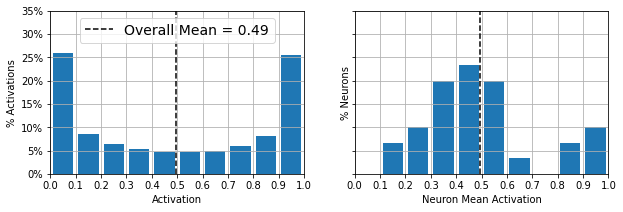

In [37]:
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

- 코딩층에서 활성화되는 뉴런 수를 감소시키기 위해 코딩 층에 $\ell_1$ 규제를 추가: ♣♣♣

In [38]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4310 - rounded_accuracy: 0.8129 - val_loss: 0.3808 - val_rounded_accuracy: 0.8555
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3690 - rounded_accuracy: 0.8689 - val_loss: 0.3638 - val_rounded_accuracy: 0.8741
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3545 - rounded_accuracy: 0.8799 - val_loss: 0.3502 - val_rounded_accuracy: 0.8857
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3437 - rounded_accuracy: 0.8876 - val_loss: 0.3418 - val_rounded_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3372 - rounded_accuracy: 0.8920 - val_loss: 0.3368 - val_rounded_accuracy: 0.8949
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3320 - rounded_accuracy: 0.8968 - val_loss: 0.3316 - val_rounded_accuracy: 0.8992
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 83ms/step


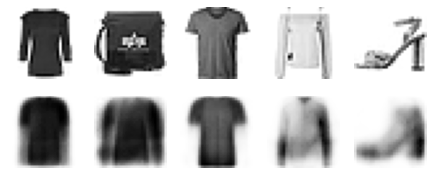

In [39]:
show_reconstructions(sparse_l1_ae)

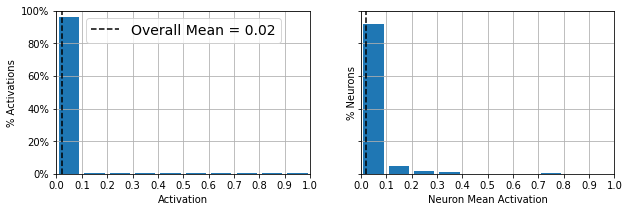

In [40]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

- 신경망이 입력 이미지에서 불필요한 것을 제외하고 가장 중요한 코딩을 보전하도록 만듦 ♣♣
- 비용 함수에 희소 손실(sparsity loss)을 추가 ♣♣♣
  - 예: 쿨백-라이블러 발산(Kullback-Leibler divergence) 사용

####  (6) 변이형 오토인코더 (VAE; variational autoencoder)

1] 개념 ♣

- 잠재 공간(latent space)에서의 관찰을 설명하는 확률적 방식 
- 다시 말해, VAE의 encoder는 각 특징을 설명하는 single value를 출력하는 것이 아닌, 각 latent attribute에 대한 확률 분포를 출력함 ♣♣
- 인코더를 통해 확률 분포를 뽑아내고, 확률 분포에서 랜덤 샘플링된 값 z를 통해 이미지를 복원

2] 특징 ♣♣

- [1] 확률적 오토인코더(probabilistic autoencoder) : 훈련이 끝난 후에도 출력이 부분적으로 우연에 의해 결정됨
- [2] 생성 오토인코더(generative autoencoder) : 훈련 세트에서 샘플링된 것 같은 새로운 샘플을 생성

3] 구조

- VAE의 코딩층은 다른 오토인코더와는 다른 부분이 있는데 주어진 입력에 대해 바로 코딩을 만드는 것이 아니라, 인코더(encoder)는 평균 코딩 μ​와 표준편차 코딩 σ​을 만듦
- 실제 코딩은 평균이 ​μ이고 표준편차가 σ​​​​인 가우시안 분포(gaussian distribution)에서 랜덤하게 샘플링되며, 이렇게 샘플링된 코딩을 디코더(decoder)가 원본 입력으로 재구성
- VAE는 마치 가우시안 분포에서 샘플링된 것처럼 보이는 코딩을 만드는 경향이 있는데, 학습하는 동안 손실함수가 코딩(coding)을 가우시안 샘플들의 집합처럼 보이는 형태를 가진 코딩 공간(coding space) 또는 잠재 변수 공간(latent space)로 이동시키기 때문
- 이러한 이유로 VAE는 학습이 끝난 후에 새로운 샘플을 가우시안 분포로부터 랜덤한 코딩을 샘플링해 디코딩해서 생성할 수 있음

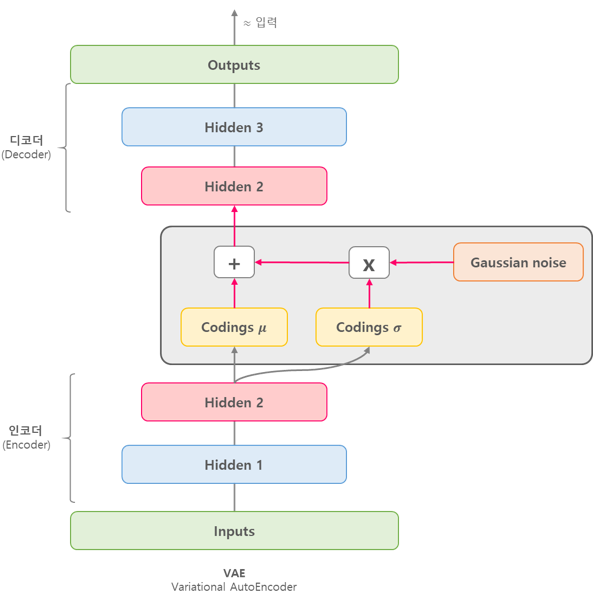

4] 예제

In [41]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [42]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 10s 21ms/step - loss: 0.3894 - rounded_accuracy: 0.8611 - val_loss: 0.3494 - val_rounded_accuracy: 0.8965
Epoch 2/25
430/430 [==============================] - 8s 20ms/step - loss: 0.3426 - rounded_accuracy: 0.8979 - val_loss: 0.3412 - val_rounded_accuracy: 0.9036
Epoch 3/25
430/430 [==============================] - 9s 20ms/step - loss: 0.3326 - rounded_accuracy: 0.9053 - val_loss: 0.3396 - val_rounded_accuracy: 0.9033
Epoch 4/25
430/430 [==============================] - 9s 20ms/step - loss: 0.3277 - rounded_accuracy: 0.9093 - val_loss: 0.3303 - val_rounded_accuracy: 0.9052
Epoch 5/25
430/430 [==============================] - 8s 20ms/step - loss: 0.3246 - rounded_accuracy: 0.9119 - val_loss: 0.3288 - val_rounded_accuracy: 0.9113
Epoch 6/25
430/430 [==============================] - 9s 20ms/step - loss: 0.3224 - rounded_accuracy: 0.9138 - val_loss: 0.3238 - val_rounded_accuracy: 0.9120
Epoch 7/25
430/430 [=========================

1/1 [==============================] - 0s 135ms/step


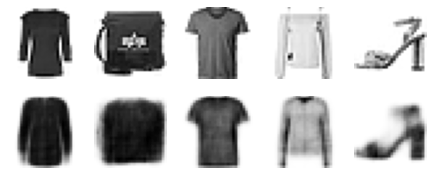

In [43]:
show_reconstructions(variational_ae)
plt.show()

패션 MNIST 이미지 생성하기

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

몇 개의 랜덤한 코딩을 생성하고 이를 디코딩하여 결과 이미지를 출력:

Saving figure vae_generated_images_plot


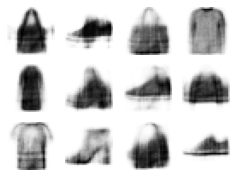

In [ ]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)

- 변이형 오토인코더로 생성된 패션 MNIST 이미지 
  - 어느정도 그럴싸한 이미지가 생성됨 
  - 세부 튜닝 후 오래 훈련하면 더 좋아질 것

2] 특징 이어서

- [3] 시맨틱 보간 (semantic interpolation) ♣♣
    - 1]] 개념
        - 변이형 오토인코더는 시맨틱 보간 수행 가능
        - 픽셀 수준이 아닌, 코딩 수준에서의 이미지 보간
    - 2]] 방법 
        - 두 이미지를 인코더에 통과시켜 얻은 두 코딩을 보간함 
        - 그 후 보간된 코딩을 디코딩하여 최종 이미지를 얻음 
        - 결과는 원본 이미지 사이에 있는 중간 이미지가 됨
    - 3]] 이미지 사이에서 의미 보간 ♣♣
        - 12개의 코딩을 생성하여, 이를 3x4 격자로 만듦 
        - tf.image.resize() 함수를 사용해 격자를 5x7 크기로 바꿈 
        - resize() 함수가 기본적으로 이중 선형 보간을 수행하므로, 늘어난 모든 행과 열이 보간된 코딩을 가짐
        - 그 후 디코더로 이미지 생성

Saving figure semantic_interpolation_plot


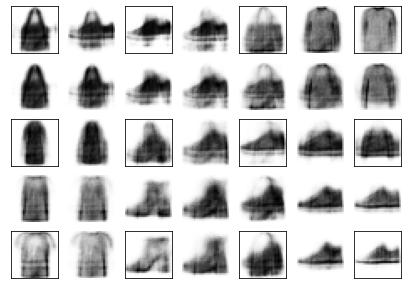

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")

## 2. 생성적 적대 신경망

### 1) 개념

- 2014년 논문에서 제안된 아이디어로, 획기적이지만 GAN 훈련의 어려움을 극복하는 데 많은 시간이 걸렸음
- 신경망을 서로 겨루게 하고 경쟁을 통해 신경망을 향상하는 것을 기대함 

### 2) 구조

- (1) 생성자 ♣♣♣
    - 랜덤한 분포(ex. 가우시안 분포)를 입력으로 받아 이미지와 같은 데이터를 출력
    - 랜덤한 입력은 생성할 이미지의 잠재 표현(=코딩)
    - 변이형 오토인코더의 디코더와 같은 기능 (가우시안 잡음 -> 새로운 이미지 생성, 훈련 방식은 다름)
    - 목표: 판별자를 속일 만큼 진짜 같은 이미지 생성
- (2) 판별자 
    - 생성자에서 얻은 가짜 이미지나 훈련 세트에서 추출한 진짜 이미지를 입력으로 받아, 입력된 이미지가 가짜인지 진짜인지 구분함
    - 목표: 진짜 이미지와 가짜 이미지를 잘 구분

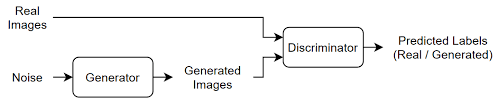

### 3) 과정

- GAN은 다른 목표를 가진 두 네트워크로 구성되므로, 훈련 반복이 두 단계로 이루어짐 ♣♣ 매우 중요
  - (1단계) 판별자 훈련 
    - 훈련 세트에서 실제 이미지 배치를 샘플링하고 생성자에서 생성한 동일한 수의 가짜 이미지를 합침 ♣
    - 가짜 이미지의 레이블은 0, 진짜 이미지는 1로 세팅 
    - 판별자는 이진 크로스 엔트로피를 사용해 한 스텝 동안 위처럼 레이블된 배치로 훈련 ♣
    - 이 단계에서, 역전파는 판별자의 가중치만 최적화 ♣
  - (2단계) 생성자 훈련 
    - 생성자를 사용해 다른 가짜 이미지 배치를 만듦 
    - 그 후, 판별자를 사용해 이미지가 진짜인지 가짜인지 판별함 
    - 배치에 진짜 이미지를 추가하지 않고, 레이블을 모두 1(진짜)로 세팅 ♣
      - 즉, 생성자는 판별자가 진짜라고 믿을만한 이미지를 만드는 것이 목적
      - 생성자가 만든 가짜데이터를 판별자가 실제 데이터라고 추정할 확률을 최대화하도록 학습
    - 판별자의 가중치를 동결해, 역전파는 생성자의 가중치에만 영향 ♣♣♣
    - 생성자가 입력으로 받는 것은 판별자를 통해 전달되는 그래디언트가 전부 ♣♣♣
      -즉, 생성자는 진짜 이미지를 보지 않고, 판별자의 반응만을 보고 학습함

### 4) 예제

패션 MNIST 데이터셋으로 GAN 학습하기:
- (1) 생성자와 판별자 생성 ♣♣
  - 생성자는 오토인코더의 디코더와 비슷한 모습 ♣
  - 판별자는 일반적인 이진 분류기 (이미지 입력, 하나의 유닛, sigmoid의 Dense층)  ♣
  - 훈련 반복의 두 번째 단계에서 생성자와 판별자가 연결된 전체 GAN 모델 필요

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

- (2) GAN 모델 컴파일 ♣♣♣
  - 판별자는 이진 분류기이므로, 이진 크로스 엔트로피 손실 사용 
  - 생성자는 GAN 모델을 통해서만 훈련되므로, 따로 컴파일할 필요X ♣♣
  - GAN 모델도 이진 분류기이므로, 이진 크로스 엔트로피 손실 사용 
  - (trainable 속성 : 모델을 컴파일할 때만 영향을 미침)

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

- (3) 이미지를 순회하는 Dataset 생성

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

- (4) 훈련 반복 코드 구현 ♣♣
  - 훈련이 일반적인 반복이 아니기 때문에, fit() method를 사용하지 않음 ♣
  - 사용자 정의 훈련 반복문을 만들어 사용 ♣
    - 1단계 : 판별자 훈련
      - 가우시안 잡음을 생성자에 주입하여 가짜 이미지를 생성 
      - 생성한 이미지와 동일한 개수의 진짜 이미지를 합쳐 배치를 구성 
      - 타깃 y1은 가짜 이미지일 경우 0, 진짜 이미지일 경우 1로 설정 
      - 이 배치에서 판별자를 훈련
    - 2단계 : 생성자 훈련
      - GAN에 가우시안 잡음을 주입 
      - 생성자가 먼저 가짜 이미지를 생성하고, 판별자가 그 이미지가 가짜인지 진짜인지 추측 
      - 판별자가 가짜 이미지를 진짜로 믿게 만들고 싶기 때문에, 타깃 y2를 1로 지정

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()                                                    # not shown

- (5) 생성된 이미지 출력 
  - 첫 번째 epoch에서 패션 MNIST처럼 보이는 이미지를 생성한 모습 
  - 하지만 이보다 더 좋은 이미지가 생성되지 않고, 오히려 어떤 epoch에서는 GAN이 학습한 것을 잊어버린 듯한 모습을 보임

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

### 5) 특징

#### (1) 목적 : 제로섬 게임

- 훈련 과정에서 생성자와 판별자는 끊임없이 서로 앞서려고함 : 제로섬 게임(zero-sum game)
    - GAN은 내시 균형(Nash equilibrium)이라는 상태에 도달하는 것을 목표로 함 ♣♣
      - 어떤 플레이어도 자신의 전략을 수정하지 않는 상태 
      - e.g., 모든 사람이 도로 왼쪽으로 운전할 때, 어떤 운전자도 반대 방향으로 운전하는 것이 도움이 되지 않는 상태
      - e.g., 생성자가 완벽하게 실제와 같은 이미지를 만들어내 판별자가 추측밖에 할 수 없을 때
      - 그러나 두 가지 어려움이 있음
        - 모드 붕괴 (mode collapse)
        - 파라미터 변동

#### (2) 단점

1] 모드 붕괴 ♣♣♣ GAN의 가장 큰 문제

- 생성자의 출력의 다양성이 줄어들 때 발생 

- e.g., 생성자가 다른 클래스보다 신발을 더 그럴듯하게 만든다고 가정 
    - [1] 신발이 판별자를 속이기 쉽기 때문에, 더 많은 신발 이미지를 만들도록 유도됨 -> 생성자는 점차 다른 이미지를 생성하는 방법을 잊게 됨 
    - [2] 그동안 판별자가 보게 될 가짜 이미지는, 신발이 유일하게 될 것
      - 따라서 판별자도 다른 클래스의 가짜 이미지를 구별하는 방법을 잊어버리게 됨 
    - [3] 판별자가 신발을 잘 구별하게 되면, 생성자는 다른 클래스로 옮겨가야 함
      - 셔츠로 옮겨가서 잘 훈련을 하게되면, 신발에 대해서는 또 잊어버리게 됨 
    - [4] 그렇게 되면, 판별자도 뒤따라 가게 됨 
    - [5] 결론적으로, 이 GAN은 몇 개의 클래스를 오가다가, 어떤 클래스에서도 좋은 결과를 만들지 못할 수 있음

2] 파라미터 변동 ♣♣♣

- 생성자와 판별자가 지속적으로 서로에게 영향을 주어, 파라미터 변동이 크고, 불안정해질 수 있음 
    - 훈련이 안정적으로 시작되어도, 이유 없이 갑자기 발산할 수 있음
    - 여러 요인이 이런 복잡한 관계에 영향을 주어 GAN의 하이퍼파라미터는 매우 민감하며, 이런 하이퍼파라미터 튜닝을 위해서 많은 노력이 필요 ♣

#### (3) 해결방법

- 안정적인 GAN 훈련을 위한 방법 
  - 1] 경험 재생 (experience replay) ♣♣♣
    - 매 반복에서 생성자가 만든 이미지를 재생 버퍼에 저장하고 실제 이미지와 이 버퍼에서 뽑은 가짜 이미지를 더해 판별자를 훈련
      - 판별자가 생성자의 가장 최근 출력에 과대적합될 가능성을 줄임 
      - 컴퓨팅 타임 증가(훈련 속도 저하)
  - 2] 미니배치 판별 ♣♣♣
    - 배치 간에 얼마나 비슷한 이미지가 있는지 측정하여, 이 통계를 판별자에게 제공, 판별자는 다양성이 부족한 가짜 이미지 배치 전체를 쉽게 거부할 수 있음
      - 생성자가 다양한 이미지를 생성하도록 유도해, 모드 붕괴의 위험을 줄임

### 6) 종류

#### (1) 심층 합성곱 GAN (DCGAN; deep convolutional GAN)

1] 개념

- 2014년 원본 GAN 논문에서는, 합성곱 층을 통해 작은 이미지만 생성함 
- 그 후, 큰 이미지를 위해 깊은 합성곱 층 기반의 GAN을 만들기 위해 노력
  - 2015년, 여러 구조와 하이퍼파라미터 실험 끝에 심층 합성곱 GAN (DCGAN) 이 제안됨

2] 가이드라인 ♣♣♣

- 안정적인 합성곱 GAN을 구축하기 위한 가이드라인 
  - [1] 판별자
      - 1] 풀링 층 : 스트라이드 합성곱으로 변경
      - 2] 활성화 함수 : 모든 층은 LeakyReLU 활성화 함수를 사용 
          - 경험적으로 selu보다 LeakyReLU가 좋아서 사용하지만, 좋지 않은 경우도 많다
          - "항상 맞는 것은 아니므로, 여러 실험이 필요!"
      - 3] 배치 정규화
  - [2] 생성자
      - 1] 풀링 층 : 전치 합성곱으로 변경
      - 2] 활성화 함수 : 모든 층은 ReLU 활성화 함수를 사용
      - 3] 배치 정규화
  - [3] 깊은 층을 위해 완전 연결 은닉층을 제거 ♣♣♣

3] 예제

- 패션 MNIST DCGAN 모델 
  - 생성자 ♣♣
    - 크기 100의 코딩을 받아 6272차원으로 투영하고, 이 결과를 7x7x128 크기의 텐서로 바꿈 
    - 텐서는 배치 정규화를 거쳐 stride가 2인 전치 합성곱 층에 주입됨 ♣♣
    - 7x7 -> 14x14 로 업샘플링, 128 -> 64 깊이 감소(conv autoencoder에서 decoder에서 하는 행위와 유사)
    - 다시 배치 정규화를 거쳐 stride가 2인 전치 합성곱 층에 주입됨 
    - 14x14 -> 28x28 로 업샘플링, 64 -> 1 깊이 감소 
    - tanh을 사용하므로, 출력 범위가 -1에서 1 사이 ♣♣
      - GAN 훈련 전 훈련 세트를 동일 범위로 스케일 조정 필요
  - 판별자 ♣♣
    - 이진 분류를 위한 일반적인 CNN과 비슷한 구조이지만, 이미지를 다운 샘플링할 때 MaxPooling이 아닌 stride 합성곱을 사용(+ LeakyRelu 사용) ♣♣
    - DCGAN 가이드라인에서 변경된 점 판별자의 BatchNormalization 층 -> Dropout 층으로 변경 (훈련의 안정성을 위함) ♣♣
    - 생성자에서 LeakyReLu가 아닌 SELU 사용 ♣♣
    - 구조를 바꿔보면서, 하이퍼파라미터에 대한 민감성을 확인해볼 수 있음

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/50


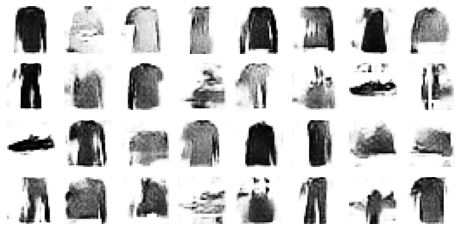

Epoch 2/50


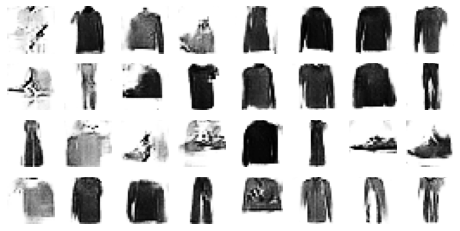

Epoch 3/50


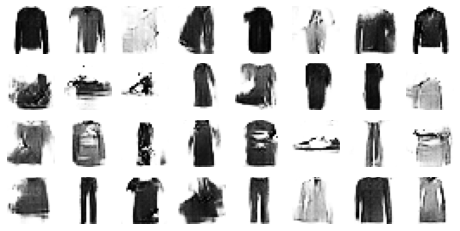

Epoch 4/50


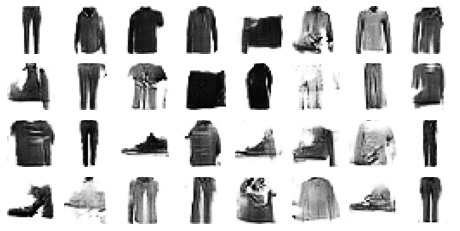

Epoch 5/50


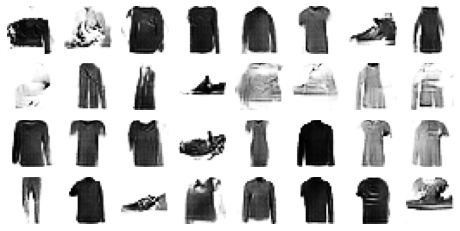

Epoch 6/50


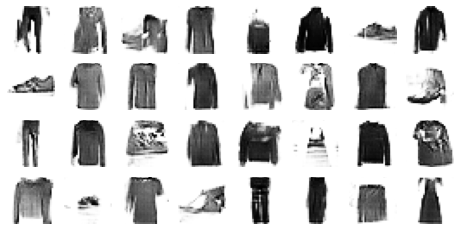

Epoch 7/50


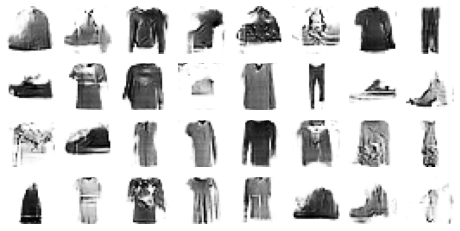

Epoch 8/50


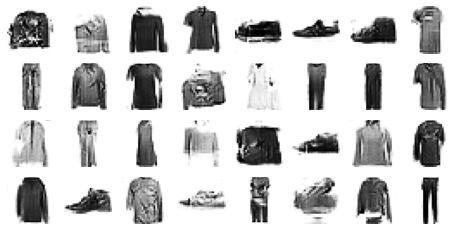

Epoch 9/50


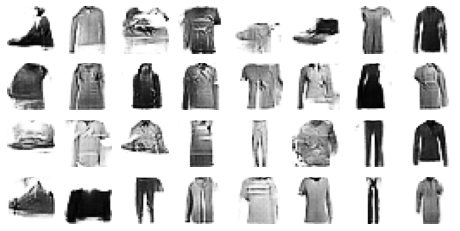

Epoch 10/50


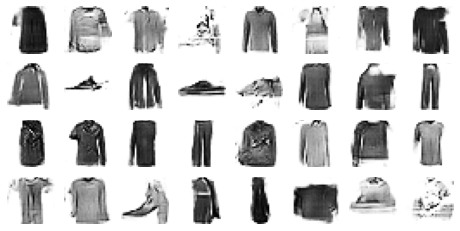

Epoch 11/50


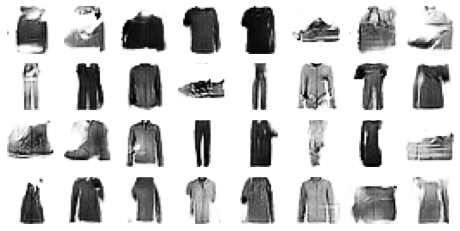

Epoch 12/50


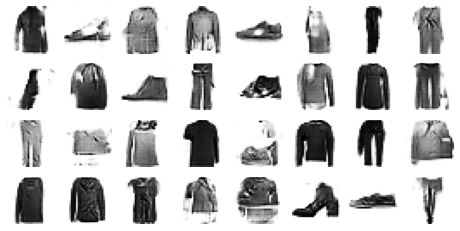

Epoch 13/50


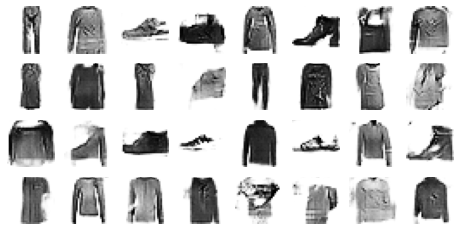

Epoch 14/50


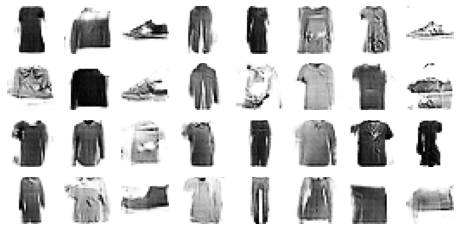

Epoch 15/50


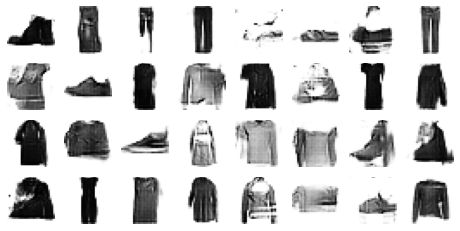

Epoch 16/50


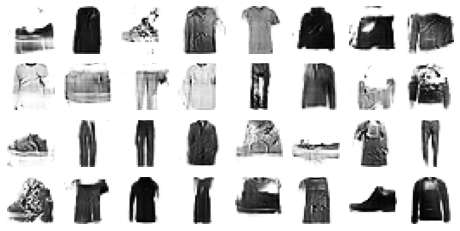

Epoch 17/50


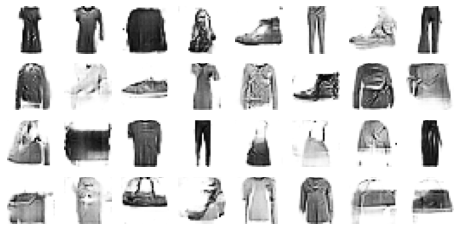

Epoch 18/50


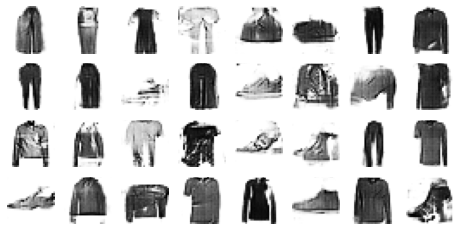

Epoch 19/50


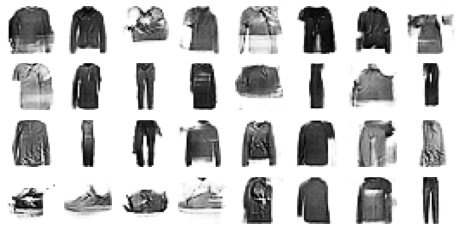

Epoch 20/50


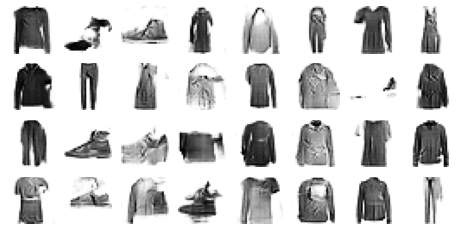

Epoch 21/50


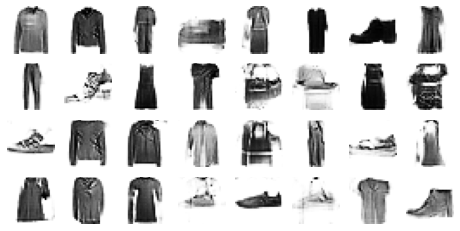

Epoch 22/50


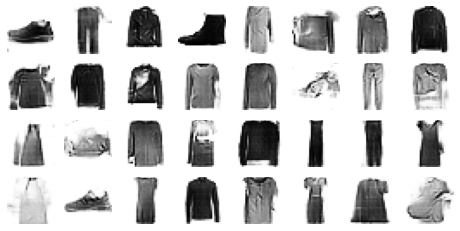

Epoch 23/50


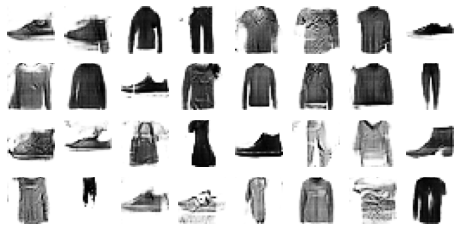

Epoch 24/50


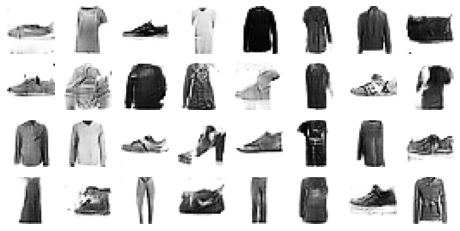

Epoch 25/50


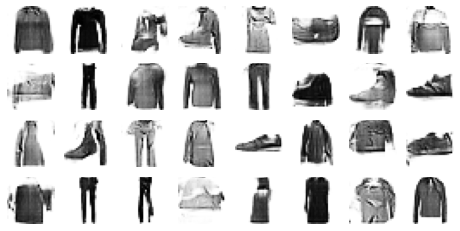

Epoch 26/50


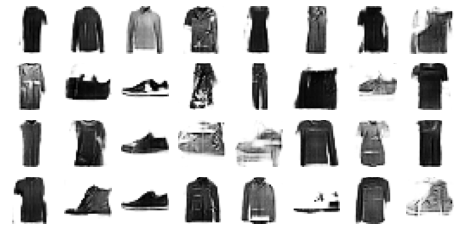

Epoch 27/50


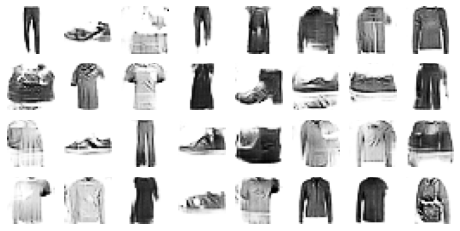

Epoch 28/50


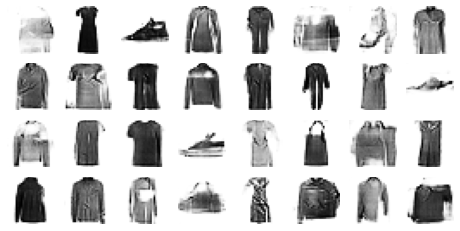

Epoch 29/50


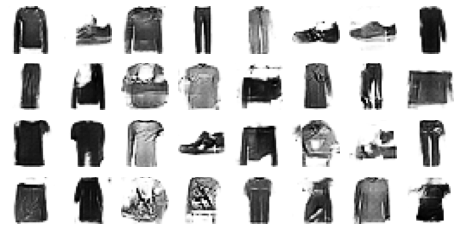

Epoch 30/50


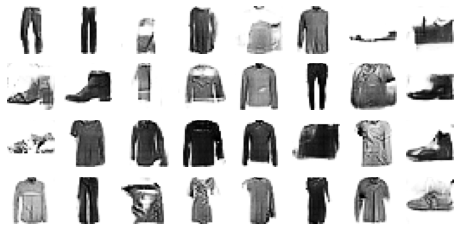

Epoch 31/50


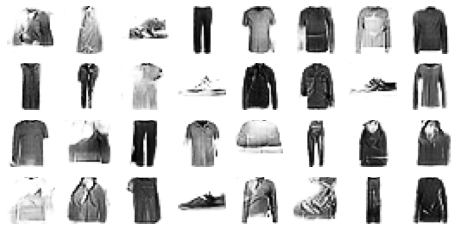

Epoch 32/50


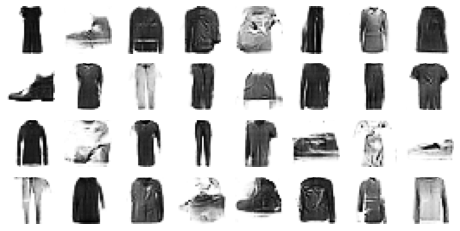

Epoch 33/50


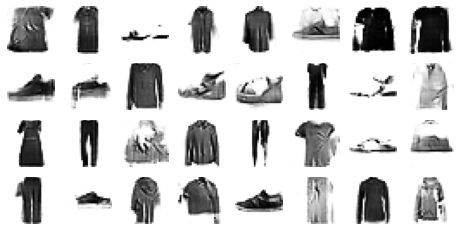

Epoch 34/50


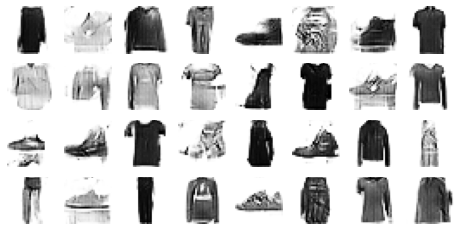

Epoch 35/50


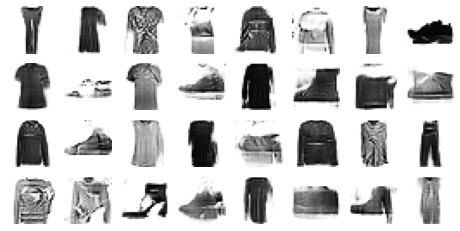

Epoch 36/50


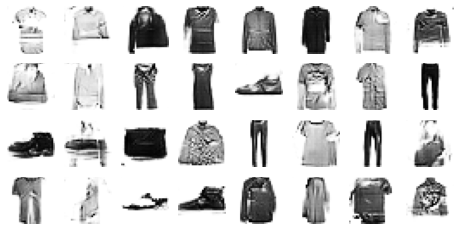

Epoch 37/50


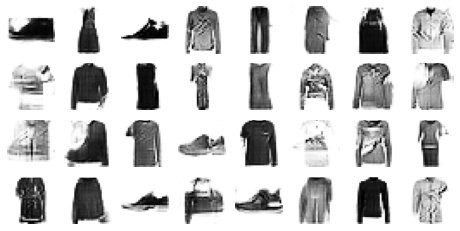

Epoch 38/50


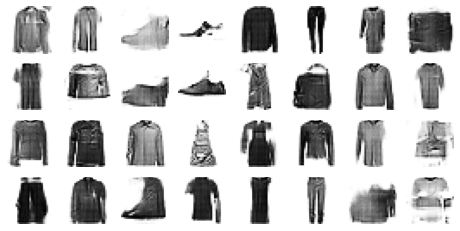

Epoch 39/50


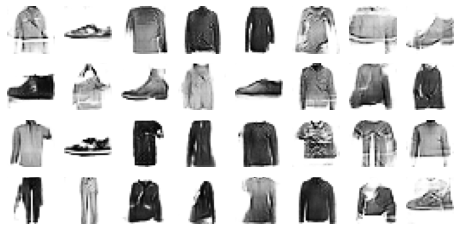

Epoch 40/50


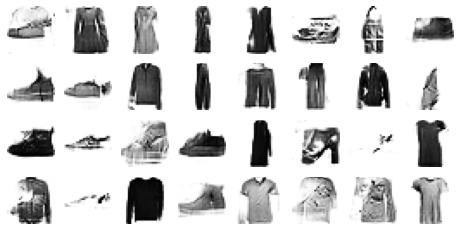

Epoch 41/50


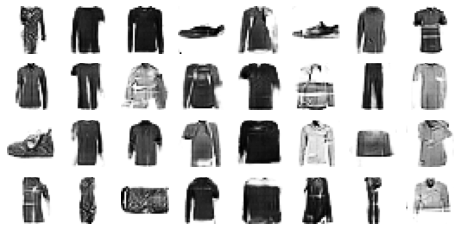

Epoch 42/50


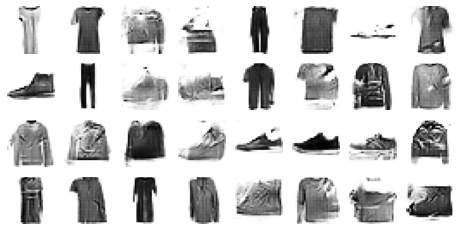

Epoch 43/50


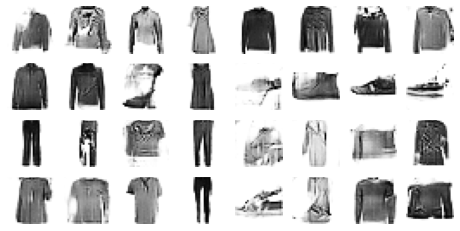

Epoch 44/50


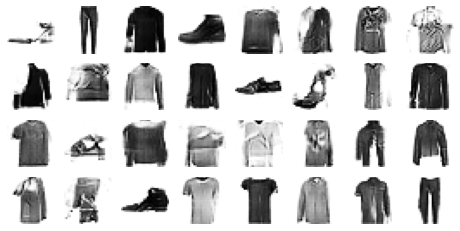

Epoch 45/50


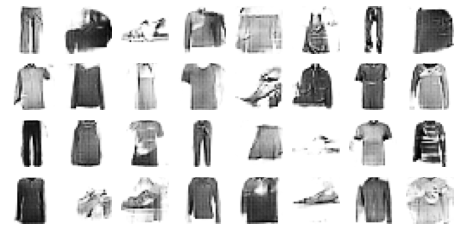

Epoch 46/50


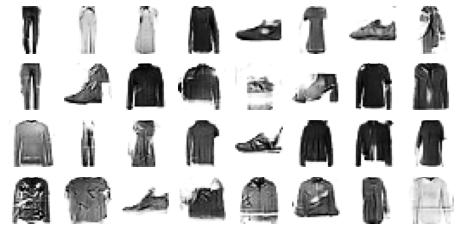

Epoch 47/50


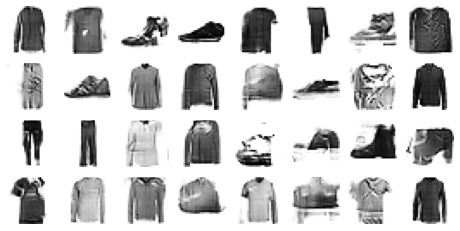

Epoch 48/50


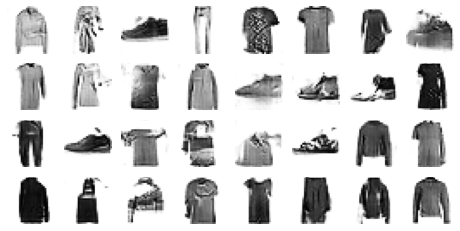

Epoch 49/50


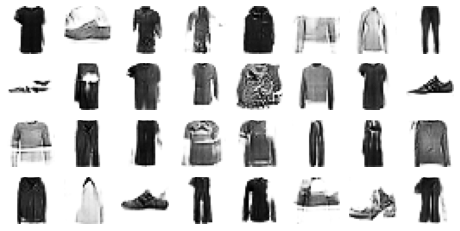

Epoch 50/50


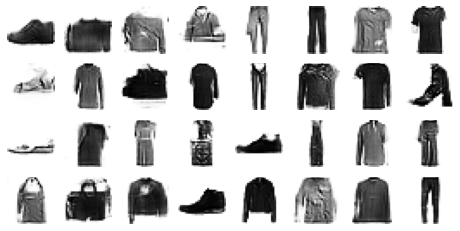

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

Saving figure dcgan_generated_images_plot


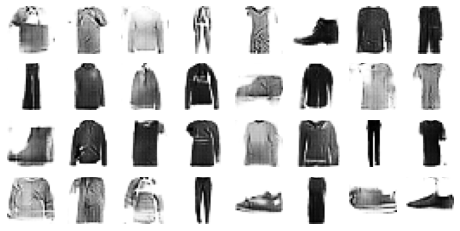

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

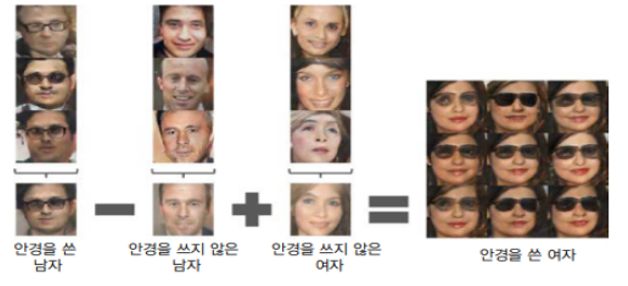

4] 예시

- DCGAN의 잠재 표현 학습 ♣♣
  - 세 카테고리(안경을 쓴 남자, 안경을 쓰지 않은 남자, 안경을 쓰지 않은 여자)의 이미지를 생성하기 위한 코딩을 평균하고, 이 평균 코딩으로 이미지를 생성 ♣
  - 왼쪽 아래 3개 이미지는, 그 위 3개 이미지의 평균을 나타냄
  - 평균 : 픽셀 수준의 단순한 평균 계산이 아닌, 잠재 공간에서 계산됨. 따라서 이미지가 자연스러운 얼굴처럼 보일 수 있음 ♣
  - 가운데 이미지를 둘러싼 8개의 이미지는, DCGAN의 시맨틱 보간 능력을 보여주기 위해 동일한 벡터에 약간의 잡음을 추가해 생성한 것 ♣

#### (2) ProGAN ♣ 구조 정도만 간단히 기억

1] 개념

- 훈련 초기에 작은 이미지를 생성하고 점진적으로 생성자와 판별자에 합성곱 층을 추가해 갈수록 큰 이미지를 만드는 방법 
- 적층 오토인코더를 층별로 훈련하는 것과 비슷 
- 이전에 훈련 된 층은 그대로 두고, 생성자의 끝과 판별자의 시작 부분에 층을 추가하며 쌓아감

2] 구조 ♣

- ProGAN 구조
  - 한번에 전체 크기의 이미지 특성들을 학습 시키기보다, 4x4 저해상도로 large-scale structure를 찾아내도록 하고, 점차 finer-scale detail을 찾을 수 있도록 1024x1024 고해상도로 높아지는 것이 낫다는 아이디어 
  - 생성자의 출력을 4x4에서 8x8로 크게 하려면, 기존 합성곱 층에 업샘플링 층을 추가하여 8x8 크기 특성 맵을 출력 
  - 이 특성 맵이 새로운 다음 합성곱 층으로 주입되고, 다시 새로운 출력 합성곱 층으로 주입됨

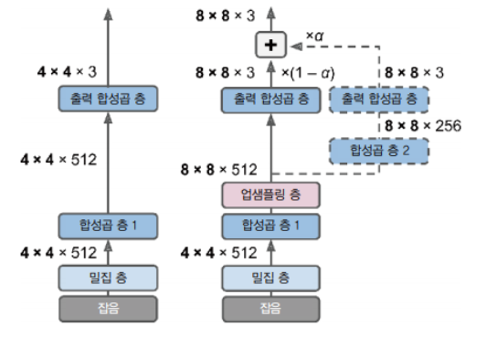

#### (3) StyleGAN ♣ 구조 정도만 간단히 기억

1] 개념

- 생성자에 스타일 트랜스퍼 기법을 사용해 생성된 이미지가 훈련된 이미지와 같은 다양한 크기의 국부적인 구조를 갖도록 만듦 ♣♣♣
- 생성된 이미지의 품질을 크게 향상시킴 
- 판별자와 손실함수는 그대로이며, 생성자만 변경됨 ♣♣

2] 구조 ♣♣

- StyleGAN 구조 
  - 두 개의 네트워크로 구성됨 
    - 매핑 네트워크, 합성 네트워크

- [1] 매핑 네트워크 ♣♣
  - 미세한 텍스처 (e.g., 머리 색상)부터 고수준 특성 (e.g., 어른 혹은 아니)까지 각기 다른 수준에서 생성된 이미지의 스타일을 제어 
  - 코딩을 여러 스타일 벡터로 매핑 
- [2] 합성 네트워크 ♣♣
  - 이미지 생성을 책임짐 
  - 일정하게 학습된 입력을 받음

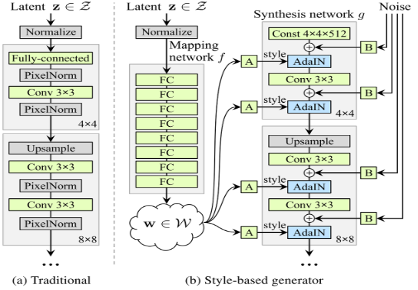